# Numerical Analysis of OT on Partition Graph vs. kNN Graph

In [1]:
from OT_functions import *

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
def random_X(n = 500, d = 2):
    return np.random.uniform(0, 1, d*n).reshape(n, d)

## Simulations

Simulate Optimal Transport on uniformly random nodes in [0,1] x [0,1] across different source/sink patterns for partition-connected graphd and kNN-connected graphs. Collect data on overall weight of transport, 
$$M_\alpha(G) = \sum_{e \in E(G)} w(e)^\alpha \text{length}(e)$$

### Distinct, Clustered, Uniform Distributions

Simulations run on 500 points with sources in one corner and sinks in the opposite corner. Mass distribution is uniform. See first image for example.

In [4]:
def make_uniform_pmf(X, source_center, sink_center, r_source = 0.5, r_sink = 0.5):
    
    assert len(source_center) == X.shape[1], 'dimension of source_center must match that of points in X'
    assert len(sink_center) == X.shape[1], 'dimension of sink_center must match that of points in X'
    
    # create binary arrays that identify whether a node is source or sink
    is_source = np.apply_along_axis(lambda x: 1 if np.linalg.norm(x - source_center) <= r_source else 0, 1, X)
    is_sink = np.apply_along_axis(lambda x: 1 if np.linalg.norm(x - sink_center) <= r_sink else 0, 1, X)
    
    # normalize arrays to sum to 1
    source_pmf = is_source / is_source.sum()
    sink_pmf = is_sink / is_sink.sum()
    
    return source_pmf - sink_pmf

In [23]:
X = random_X()
neighbors = get_k_neighbors(X, 4)
pmf = make_uniform_pmf(X, [0,0], (1,1))

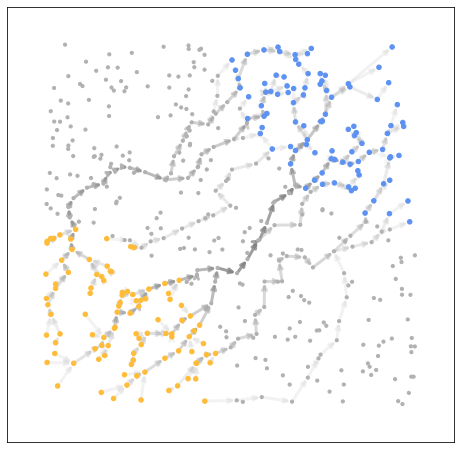

In [57]:
# Example
X = random_X()
neighbors = get_k_neighbors(X, 4)
pmf = make_uniform_pmf(X, [0,0], (1,1))

plt.figure(figsize = (8,8))
draw_digraph(create_digraph(X, neighbors, pmf))

Running simulation 300 times:

In [14]:
def get_M(G, alpha = 1):
    if G == None:
        return -1
    
    sum_weights = 0
    for (u, v) in G.edges:
        edge = G[u][v]
        sum_weights += (edge['weight']**alpha) * edge['euc_dist']
    return sum_weights

In [18]:
n = 300
weights_nearest = np.empty(n)
weights_partition = np.empty(n)

for i in range(n):
    X = random_X()
    neighbors_partition = get_k_partitioned_neighbors(X, 4, 5)
    neighbors_nearest = get_k_neighbors(X, 4)
    pmf = make_uniform_pmf(X, [0,0], (1,1))
    
    weights_nearest[i] = get_M(create_digraph(X, neighbors_nearest, pmf))
    weights_partition[i] = get_M(create_digraph(X, neighbors_partition, pmf))

In [19]:
weights_nearest.mean()

0.8750287195506902

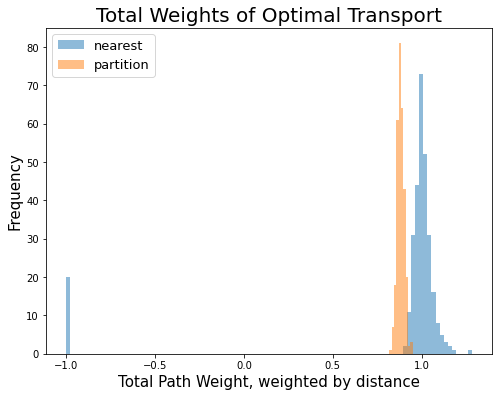

In [56]:
plt.figure(figsize=(8,6))
plt.hist(weights_nearest, bins=100, alpha=0.5, label="nearest")
plt.hist(weights_partition, bins=10, alpha=0.5, label="partition")
plt.legend(loc='upper left', prop={'size': 13})
plt.title('Total Weights of Optimal Transport', size = 20)
plt.xlabel('Total Path Weight, weighted by distance', size = 15)
plt.ylabel('Frequency', size = 15)
plt.show()